# Bunch longitudinal distribution --> comparison with proton data

Having a look to the streak camera data recorded on the 2nd of November to understand if the proton beam is gaussian-, cos^2- or what- distributed

**You need to mount the eos to run this locally**

# OLD VERSION, USE VERSION 3. THAT CALLS THE DATA CORRECTED BY ANNA-MARIA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import h5py
import pandas as pnd
import glob
import os

# Import the data

In [77]:
if os.path.isfile('data_streak_camera.pkl'):#here we go again, just load
    print('Data already exist!')
    data = pnd.read_pickle('data_streak_camera.pkl')

else:
    flist = sorted(glob.glob('/Users/esenes/eos/user/e/esenes/AWAKE_streak_data/*')); fnum = len(flist)

    # init stuff
    timestamps = []
    streakImages = []
    # parse all the files
    for k, file in enumerate(flist):
        if np.mod(k,100) == 0:
            print('Processing file '+str(k)+str('/')+str(fnum))
        f = h5py.File(file, 'r')
        timestamps.append(f['AwakeEventInfo']['timestamp'].value)

        # search for when the streak camera was on
        if type(f['AwakeEventData']['XMPP-STREAK']['StreakImage']) == h5py._hl.group.Group: 
            # dump to a dictionary and append it to the array
            tmp_dict = dict()
            for key in list(f['AwakeEventData']['XMPP-STREAK']['StreakImage'].keys()):
                tmp_dict[key] = f['AwakeEventData']['XMPP-STREAK']['StreakImage'][key].value
            streakImages.append(tmp_dict)
            del(tmp_dict)
        else:
            streakImages.append(None)

        f.close()

Processing file 0/2112
Processing file 100/2112
Processing file 200/2112
Processing file 300/2112
Processing file 400/2112
Processing file 500/2112
Processing file 600/2112
Processing file 700/2112
Processing file 800/2112
Processing file 900/2112
Processing file 1000/2112
Processing file 1100/2112
Processing file 1200/2112
Processing file 1300/2112
Processing file 1400/2112
Processing file 1500/2112
Processing file 1600/2112
Processing file 1700/2112
Processing file 1800/2112
Processing file 1900/2112
Processing file 2000/2112
Processing file 2100/2112


In [138]:
# back to human readable
timestamps = np.array(timestamps)
timestamps = pnd.to_datetime(timestamps)

# dump to dataframe
data = pnd.DataFrame(columns=['streakImageHeight','streakImageData','streakImageMcpGain','streakImageProjection','streakImageTimeValues','streakImageWidth','camera_is_on'], index=timestamps)


In [139]:
assert len(timestamps) == len(streakImages)
# parse the streak data and fill the dataframe
for k,s in enumerate(streakImages):
    ts = timestamps[k]
    if streakImages[k] == None:
        data['streakImageHeight'].loc[ts] = np.nan
        data['streakImageData'].loc[ts] = np.empty(0, dtype=np.int32)
        data['streakImageMcpGain'].loc[ts] = np.nan
        data['streakImageProjection'].loc[ts] = np.empty(0, dtype=np.float32)
        data['streakImageTimeValues'].loc[ts] = np.empty(0)
        data['streakImageWidth'].loc[ts] = np.nan
        data['camera_is_on'].loc[ts] = False
    else:
        data['streakImageHeight'].loc[ts] = streakImages[k]['streakImageHeight'][0]
        data['streakImageData'].loc[ts] = streakImages[k]['streakImageData']
        data['streakImageMcpGain'].loc[ts] = streakImages[k]['streakImageData']
        data['streakImageProjection'].loc[ts] = streakImages[k]['streakImageProjection']
        data['streakImageTimeValues'].loc[ts] = streakImages[k]['streakImageTimeValues']
        data['streakImageWidth'].loc[ts] = streakImages[k]['streakImageWidth'][0]
        data['camera_is_on'].loc[ts] = True

#check streakImages[1400].keys() for reference
data.to_pickle('data_streak_camera.pkl')

In [137]:
data.iloc[1400:1410]

,streakImageHeight,streakImageData,streakImageMcpGain,streakImageProjection,streakImageTimeValues,streakImageWidth,camera_is_on
2018-11-02 12:52:00.135,512,"[430, 425, 435, 433, 434, 420, 410, 432, 417, ...","[430, 425, 435, 433, 434, 420, 410, 432, 417, ...","[430.41806, 428.35876, 430.16666, 433.009, 435...","[2.211603188, 4.42371933, 6.63634559, 8.849479...",672,True
2018-11-02 12:52:26.535,NaN,[],NaN,[],[],NaN,False
2018-11-02 12:52:51.735,512,"[429, 430, 423, 430, 428, 419, 432, 414, 431, ...","[429, 430, 423, 430, 428, 419, 432, 414, 431, ...","[430.94934, 428.4348, 426.42996, 429.6042, 431...","[2.211603188, 4.42371933, 6.63634559, 8.849479...",672,True
2018-11-02 12:53:18.135,NaN,[],NaN,[],[],NaN,False
2018-11-02 12:53:43.335,512,"[431, 428, 432, 448, 422, 426, 432, 433, 429, ...","[431, 428, 432, 448, 422, 426, 432, 433, 429, ...","[432.5207, 432.753, 434.0359, 429.88696, 429.0...","[2.211603188, 4.42371933, 6.63634559, 8.849479...",672,True
2018-11-02 12:54:09.735,NaN,[],NaN,[],[],NaN,False
2018-11-02 12:54:34.935,512,"[417, 424, 419, 427, 437, 431, 437, 424, 427, ...","[417, 424, 419, 427, 437, 431, 437, 424, 427, ...","[434.21246, 430.78415, 430.70514, 429.9391, 43...","[2.211603188, 4.42371933, 6.63634559, 8.849479...",672,True
2018-11-02 12:55:01.335,NaN,[],NaN,[],[],NaN,False
2018-11-02 12:55:26.535,512,"[438, 422, 418, 426, 431, 416, 406, 418, 410, ...","[438, 422, 418, 426, 431, 416, 406, 418, 410, ...","[432.93903, 430.09518, 431.47525, 431.64862, 4...","[2.211603188, 4.42371933, 6.63634559, 8.849479...",672,True
2018-11-02 12:55:52.935,NaN,[],NaN,[],[],NaN,False


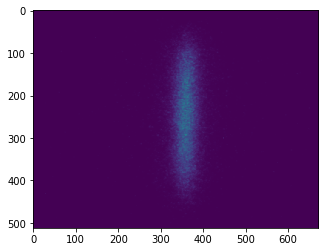

In [132]:
def showStreakImage(streakImageData, height, width):
    im = np.reshape(streakImageData, (height, width))
    plt.imshow(im)
    
showStreakImage(data.iloc[1400]['streakImageData'], data.iloc[1400]['streakImageHeight'], data.iloc[1400]['streakImageWidth'])



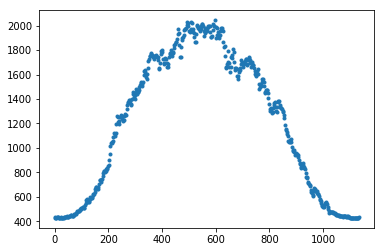

In [145]:
plt.plot(data.iloc[1400]['streakImageTimeValues'], data.iloc[1400]['streakImageProjection'],'.')

In [146]:
data.iloc[1400]

streakImageHeight                                                      512
streakImageData          [430, 425, 435, 433, 434, 420, 410, 432, 417, ...
streakImageMcpGain       [430, 425, 435, 433, 434, 420, 410, 432, 417, ...
streakImageProjection    [430.41806, 428.35876, 430.16666, 433.009, 435...
streakImageTimeValues    [2.211603188, 4.42371933, 6.63634559, 8.849479...
streakImageWidth                                                       672
camera_is_on                                                          True
Name: 2018-11-02 12:52:00.135000, dtype: object

In [179]:
np.std(data.iloc[1400]['streakImageProjection'])

565.0333

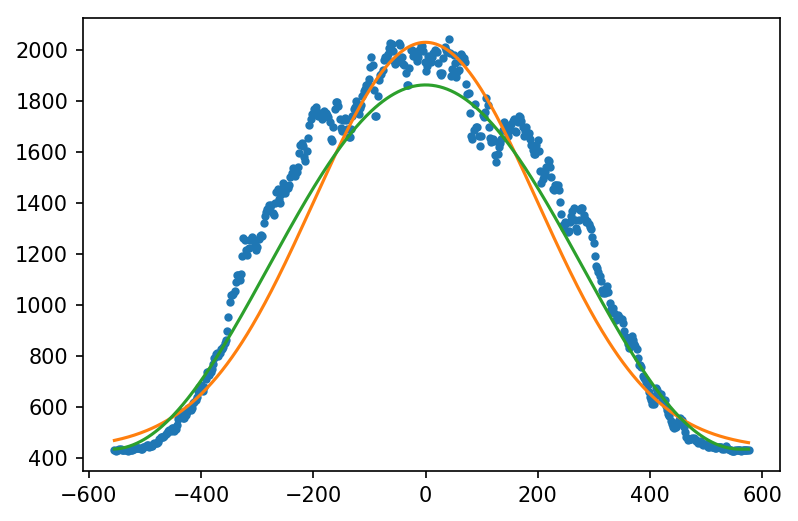

In [206]:
# rough manual fit of the curves
xx = data.iloc[1400]['streakImageTimeValues'][:-2] - np.mean(data.iloc[1400]['streakImageTimeValues']) +15
yy = data.iloc[1400]['streakImageProjection'][:-2] 
plt.plot(xx, yy,'.')



N = 0.8e6
yy = N*gaussian_shape(xx, 0., 200) + 435
plt.plot(xx, yy)

sig = 280
yy = N*cos2_shape(xx, sig) + 435
plt.plot(xx, yy)

fig = plt.gcf()
fig.dpi=150

(0, 0.05)

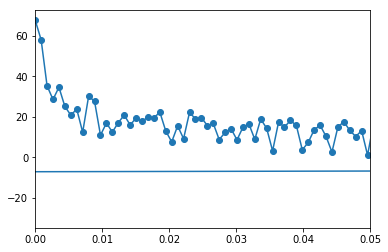

In [221]:
# FFT attempt
xx = data.iloc[1400]['streakImageTimeValues'][:-2]
yy = data.iloc[1400]['streakImageProjection'][:-2] 

x_fft, y_fft = doFFT(xx,yy)

plt.plot(x_fft,dB(y_fft),'-o')
plt.xlim(0,0.05)


# Particle distributions:

## Gaussian:

$$
f(x) = \frac{N e}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{\sigma^2} }
$$

works fine because it is already normalised to 1, so just multiplicate for the charge to get current

## Cosine square

$$
f(x) = cos^2(\frac{\pi}{4\sigma} x), \qquad \text{for a period only} 
$$

now this is not normalised to one! So computing: $$\int_{-\frac{\pi}{2}}^\frac{\pi}{2} cos^2(x) dx = \frac{1}{2} (x+sin(x)cos(x)) = \frac{\pi}{2}$$

and so similarly 
$$\int_{-2\sigma}^{2\sigma} cos^2(\frac{\pi}{4\sigma} x) dx = \frac{x}{2} + \frac{\sigma}{4}sin(\frac{\pi}{4\sigma} x) = 2\sigma$$

so the function has to be normalised multiplying for $\frac{1}{2\sigma}$ and it is 

$$
f(x) = \frac{1}{2\sigma} cos^2(\frac{\pi}{4\sigma} x)
$$

In [149]:
def gaussian_shape(x, mu, sig):
    return 1./((sig*np.sqrt(np.pi*2))) * np.exp(-0.5*((x-mu)/sig)**2)

def current(x, N, mu, sig):
    from scipy.constants import e
    return e*N*gaussian_shape(x, mu, sig )

def dB(x):
    return 20*np.log10(x)

In [150]:
def cos2_shape(x, sigma):
    a = np.pi/(4*sigma)
    
    full_out = (1./2. / sigma)*np.cos(a*x)**2
    full_out[x<-2*sigma] = 0.
    full_out[x>2*sigma] = 0.
    
    return full_out

def cos2_current(x, N, sig):
    from scipy.constants import e
    return e*N*cos2_shape(x, sig)

In [151]:
def doFFT(t, y):
    '''
    Do the FFT. Beware there is a factor 2 in the normalisation, so look at the right-hand side of the spectrum only.
    '''
    assert t.size == y.size
    dt = np.abs(t[1]-t[0])
    N_sample = t.size
    
    norm = 2/N_sample
    
    s_fft = norm*np.abs(np.fft.fft(y))
    f_fft = np.fft.fftfreq(N_sample, d=dt)
    df = np.abs(f_fft[1]-f_fft[0])

    return f_fft, s_fft

In [152]:
def coulomb_to_N(charge):
    '''
    Total bunch charge [C] to number of particles per bunch N
    '''
    from scipy.constants import e
    return charge/e

Integral=0.9999999999990906
Integral=0.999999426710126


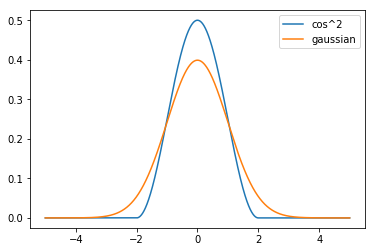

In [204]:
# distribution checks
sigma_p = 1.

tscale = np.linspace(-5*sigma_p, 5*sigma_p, 2**20)
dt = tscale[1]-tscale[0]

plt.plot(tscale, cos2_shape(tscale, sigma_p),label='cos^2')
print('Integral='+str(np.sum(cos2_shape(tscale, sigma_p)*dt)))
plt.plot(tscale, gaussian_shape(tscale, 0., sigma_p),label='gaussian')
print('Integral='+str(np.sum(gaussian_shape(tscale, 0., sigma_p)*dt)))
plt.legend(frameon=True)


# Beam distribution comparison

In [135]:
sigma_p = 0.25e-9
Np = 3e11

tscale = np.linspace(-30*sigma_p, 30*sigma_p, 2**22)

In [136]:
dt = np.abs(tscale[1]-tscale[0])
yy_p_cos2 = cos2_current(tscale, Np, sigma_p)
yy_p_gauss = current(tscale, Np, 0., sigma_p)

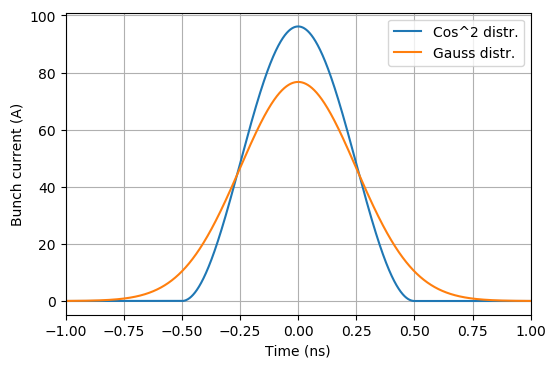

In [137]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, yy_p_cos2,label='Cos^2 distr.')
ax.plot(1e9*tscale, yy_p_gauss,label='Gauss distr.')
ax.set_xlim(-1,1)
# ax.set_ylim(-50,30)
# ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Bunch current (A)')
ax.set_xlabel('Time (ns)')
ax.legend(frameon=True)
plt.savefig('ideal_time_domain.png',format='png',dpi=300)

In [138]:
ff_p_cos2, sf_p_cos2 = doFFT(tscale,yy_p_cos2)
ff_p_gauss, sf_p_gauss = doFFT(tscale,yy_p_gauss)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


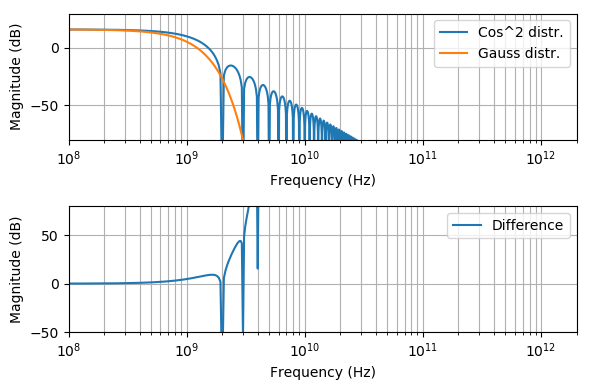

In [148]:
fig, ax = plt.subplots(2, dpi=100)
ax[0].plot(ff_p_cos2, dB(sf_p_cos2),label='Cos^2 distr.')
ax[0].plot(ff_p_gauss, dB(sf_p_gauss),label='Gauss distr.')
ax[0].set_xlim(1e8, 2e12)
ax[0].set_ylim(-80,30)
ax[0].set_xscale('log')
ax[0].grid(which='both')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].legend(frameon=True)

ax[1].plot(ff_p_gauss, dB(sf_p_cos2) - dB(sf_p_gauss),label='Difference')
ax[1].set_xlim(1e8, 2e12)
ax[1].set_ylim(-50,80)
ax[1].set_xscale('log')
ax[1].grid(which='both')
ax[1].set_ylabel('Magnitude (dB)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].legend(frameon=True)

plt.tight_layout()
plt.savefig('ideal_freq_domain_cos2vsgauss.png',format='png',dpi=300)

# ok now with electrons also

In [169]:
sigma_p = 0.25e-9
sigma_e = 1e-12
Np = 3e11
Ne = coulomb_to_N(0.6e-9)

tscale = np.linspace(-10*sigma_p, 10*sigma_p, 2**26)

In [170]:
dt = np.abs(tscale[1]-tscale[0])
yy_p_cos2 = cos2_current(tscale, Np, sigma_p)
yy_p_gauss = current(tscale, Np, 0., sigma_p)
yy_e = current(tscale, Ne, 0., sigma_e)

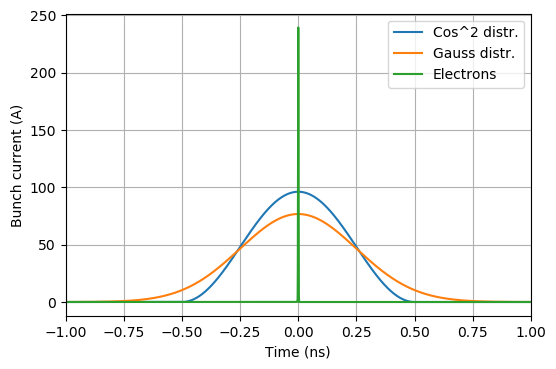

In [171]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(1e9*tscale, yy_p_cos2,label='Cos^2 distr.')
ax.plot(1e9*tscale, yy_p_gauss,label='Gauss distr.')
ax.plot(1e9*tscale, yy_e,label='Electrons')
ax.set_xlim(-1,1)
# ax.set_ylim(-50,30)
# ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Bunch current (A)')
ax.set_xlabel('Time (ns)')
ax.legend(frameon=True)
plt.savefig('ideal_time_domain.png',format='png',dpi=300)

In [172]:
ff_p_cos2, sf_p_cos2 = doFFT(tscale,yy_p_cos2)
ff_p_gauss, sf_p_gauss = doFFT(tscale,yy_p_gauss)
ff_e, sf_e = doFFT(tscale,yy_e)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


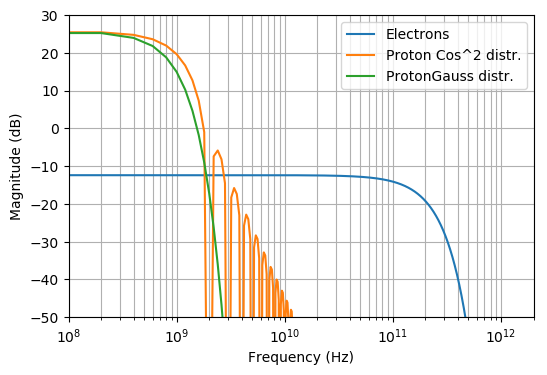

In [173]:
fig, ax = plt.subplots(1, dpi=100)
ax.plot(ff_e, dB(sf_e),label='Electrons')
ax.plot(ff_p_cos2, dB(sf_p_cos2),label='Proton Cos^2 distr.')
ax.plot(ff_p_gauss, dB(sf_p_gauss),label='ProtonGauss distr.')
ax.set_xlim(1e8, 2e12)
ax.set_ylim(-50,30)
ax.set_xscale('log')
ax.grid(which='both')
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.legend(frameon=True)
plt.savefig('ideal_freq_domain.png',format='png',dpi=300)